## Bayesian Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function,division

In [2]:
#Represent the initial position (belief) as an array
pos = [0.1]*10
pos = np.array(pos)
#Represent the hallway with 3 doors
hallway = np.array([1,1,0,0,0,0,0,0,1,0])

In [20]:
#With an initial signal of "door" we need to update the position
def plot_bar(pos):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = list(range(0,len(pos)))
    data = pos
    ax.bar(x,data)
    plt.show()

In [4]:
#Since the sensors are noisy and can be incorrect many of the times, we need to udpate the positions as we see fit.
def update(pos,measure,p_hit,p_miss):
    for i in range(len(hallway)):
        if hallway[i] == measure:
            pos[i] = pos[i]*p_hit
        else:
            pos[i] = pos[i]*p_miss
    return pos

In [5]:
#Since the above probabilities don't sum to 1, we need to normalize them
def normalize(p):
    s = sum(p)
    for i in range(len(p)):
        p[i] = p[i]/s
    return p

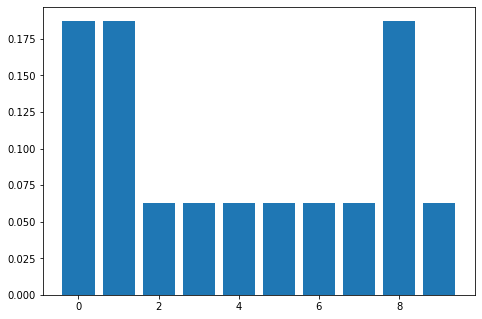

sum =  0.9999999999999997
Probability of the pet being in front of a door =  0.18749999999999992
Probability of the pet being in front of a wall =  0.062499999999999986


In [6]:
#Now, let's write the complete update function
def update(pos,measure,p_hit,p_miss):
    for i in range(len(hallway)):
        if hallway[i] == measure:
            pos[i] = pos[i]*p_hit
        else:
            pos[i] = pos[i]*p_miss
    return normalize(pos)
p = np.array([0.2]*10)
pos = update(p,1,0.6,0.2)
plot_bar(pos)
print('sum = ',sum(pos))
print('Probability of the pet being in front of a door = ',pos[0])
print('Probability of the pet being in front of a wall = ',pos[2])

[0.2245871  0.06288015 0.06109133 0.0581008  0.09334062 0.2245871
 0.06288015 0.06109133 0.0581008  0.09334062]
New Position after moving one space to the right is:  [0.09334062 0.2245871  0.06288015 0.06109133 0.0581008  0.09334062
 0.2245871  0.06288015 0.06109133 0.0581008 ]


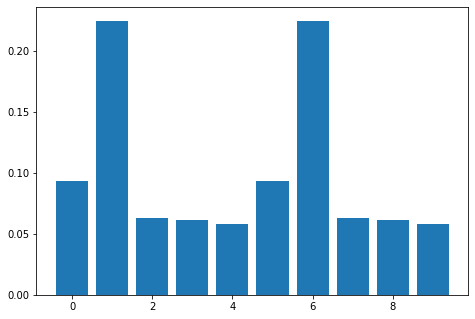

In [22]:
#Incorporating movement data
#To incorporate movement data, we need to shift the probabilities according to the number of spaces moved by the pet
#and update the array accordingly.
def perfect_predict(p,move):
    #Consider move to be positive if movement to the right and vice versa
    result = p.copy()
    for i in range(len(p)):
        result[i] = p[(i - move)]
    return result
new_pos = perfect_predict(pos,1)
print(pos)
print("New Position after moving one space to the right is: ",new_pos)
plot_bar(new_pos)

In [12]:
#Incorporating noise into the prediction.
#Now, we need to add noise which comes in overshoot and undershoot for each prediction.
def predict(p,move,p_correct,p_under,p_over):
    result = np.array(p); n = len(p)
    for i in range(n):
        result[i] = p[i - move]*p_correct + p[i - move - 1]*p_over + p[i - move + 1]*p_under
    return result

In [14]:
pos = [1.0,0,0,0,0,0,0,0,0,0]
for i in range(500):
    pos = predict(pos,1,0.8,0.1,0.1)
print(pos)
pos = [0,0,0.4,0.6,0,0,0,0]
pos_upd = predict(pos,2,0.8,0.1,0.1)
print(pos_upd)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.   0.   0.   0.04 0.38 0.52 0.06 0.  ]


[0.2245871  0.06288015 0.06109133 0.0581008  0.09334062 0.2245871
 0.06288015 0.06109133 0.0581008  0.09334062]


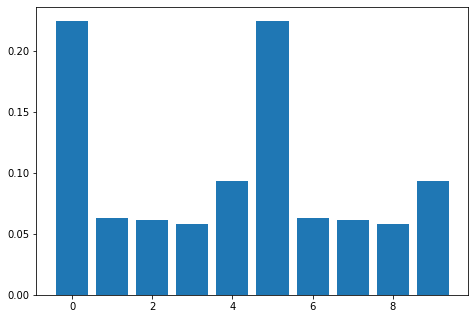

In [21]:
#Putting it together
#Consider a different hallway structure
hallway = [1,0,1,0,0,1,0,1,0,0]
pos = np.array([0.1]*10)
measurements = [1,0,1,0,0]
for m in measurements:
    pos = update(pos,m,0.6,0.2)
    pos = predict(pos,1,0.8,0.1,0.1)
print(pos)
plot_bar(pos)